In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from alibi.explainers import IntegratedGradients
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from alibi.datasets import load_cats
from alibi.utils import visualize_image_attr
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly())

TF version:  2.8.0
Eager execution enabled:  True


In [2]:
image_shape = (224, 224, 3)

In [3]:
image_shape[:2]

(224, 224)

In [4]:
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)

In [5]:
print(f'Images shape: {data.shape}')

Images shape: (4, 224, 224, 3)


In [6]:
data = (data / 255).astype('float32')

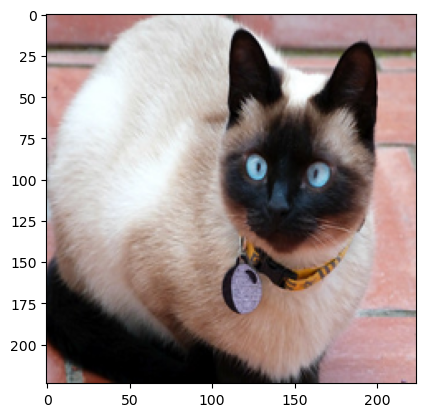

In [7]:
i = 2
plt.imshow(data[i]);

In [9]:
model = ResNet50V2(weights='imagenet')

In [10]:
n_steps = 20
method = "gausslegendre"
internal_batch_size = 20

ig = IntegratedGradients(model, n_steps=n_steps, method=method, internal_batch_size=internal_batch_size)

In [11]:
instance = np.expand_dims(data[i], axis=0)

In [12]:
type(instance)

numpy.ndarray

In [13]:
predictions = model(instance).numpy().argmax(axis=1)

In [14]:
explanation = ig.explain(instance,
                         baselines=None,
                         target=predictions)

2023-09-13 23:45:14.017582: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 330.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-09-13 23:45:14.017611: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 330.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-09-13 23:45:14.041656: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 623.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-09-13 23:45:14.041681: W tensorflow/core/common_runtime/bfc_allocator.cc:275]

In [15]:
# Metadata from the explanation object
explanation.meta

{'name': 'IntegratedGradients',
 'type': ['whitebox'],
 'explanations': ['local'],
 'params': {'target_fn': None,
  'method': 'gausslegendre',
  'n_steps': 20,
  'internal_batch_size': 20,
  'layer': 'unspecified'},
 'version': '0.9.4'}

In [16]:
# Data fields from the explanation object
explanation.data.keys()

dict_keys(['attributions', 'X', 'forward_kwargs', 'baselines', 'predictions', 'deltas', 'target'])

In [17]:
# Get attributions values from the explanation object
attrs = explanation.attributions[0]

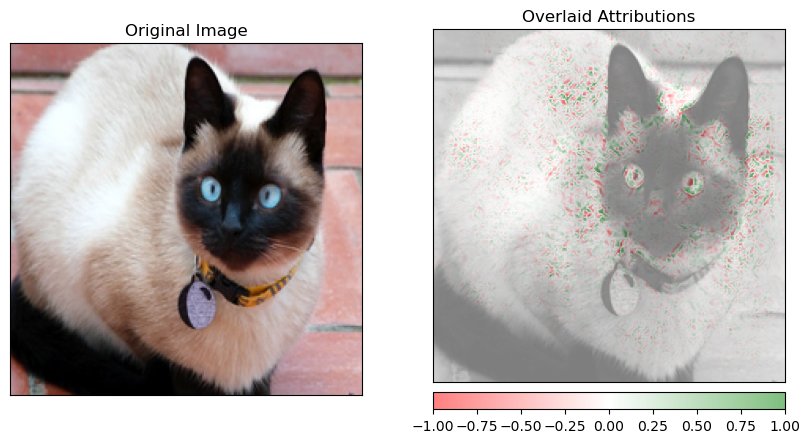

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
                    title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs.squeeze(), original_image=data[i], method='blended_heat_map',
                    sign='all', show_colorbar=True, title='Overlaid Attributions',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);

In [19]:
baselines = np.random.random_sample(instance.shape)

In [20]:
explanation = ig.explain(instance,
                         baselines=baselines,
                         target=predictions)

In [21]:
attrs = explanation.attributions[0]

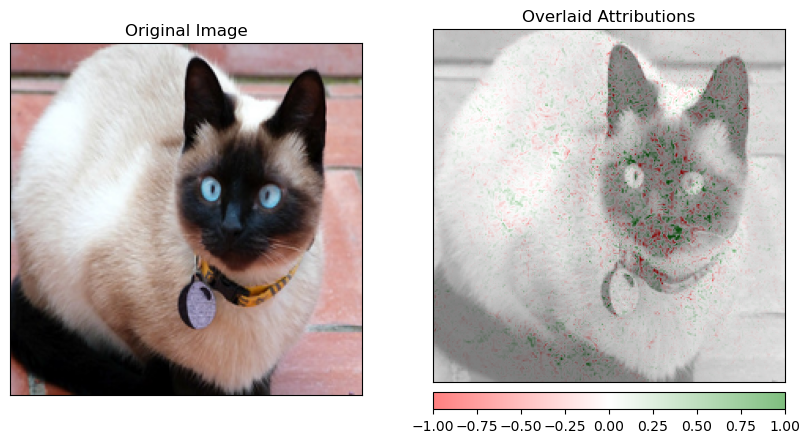

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
                    title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs.squeeze(), original_image=data[i], method='blended_heat_map',
                    sign='all', show_colorbar=True, title='Overlaid Attributions',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);